In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [2]:
print(tf.__version__)

2.7.0


In [3]:
from sklearn import datasets

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [4]:
housing=datasets.load_boston()

In [5]:
type(housing)

sklearn.utils.Bunch

In [6]:
# sklearn.utils.Bunch : dictionary 객체로 만들어 놓은 것!

In [7]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
housing['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
X_data=housing.data # 문제

In [14]:
y_data=housing.target # 답(집값)

In [73]:
y_data[:3]

array([24. , 21.6, 34.7])

In [75]:
type(X_data)

numpy.ndarray

In [74]:
type(y_data)

numpy.ndarray

In [16]:
X_data.shape

(506, 13)

In [17]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

In [21]:
X_data_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 13) (455,)
(51, 13) (51,)


In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# 레이어를 순서대로 쌓을 수 있도록 객체를 생성
model=Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear')) # 회귀일 때, 마지막 출력층의 활성화 함수

In [27]:
# 쌓은 것으로 모델 세팅
model.compile(optimizer='adam', loss='mse', metrics=['mae']) 

In [28]:
# 모델에 세팅한 내용을 요약해서 프린트
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [44]:
history=model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2) # 변수에 저장하여 아래 내용 history 출력 가능
history

Epoch 1/100
15/15 - 0s - loss: 10.0402 - mae: 2.1889 - 16ms/epoch - 1ms/step
Epoch 2/100
15/15 - 0s - loss: 9.9933 - mae: 2.1860 - 16ms/epoch - 1ms/step
Epoch 3/100
15/15 - 0s - loss: 10.0220 - mae: 2.1925 - 17ms/epoch - 1ms/step
Epoch 4/100
15/15 - 0s - loss: 10.0846 - mae: 2.2042 - 16ms/epoch - 1ms/step
Epoch 5/100
15/15 - 0s - loss: 9.8139 - mae: 2.1752 - 14ms/epoch - 962us/step
Epoch 6/100
15/15 - 0s - loss: 9.8947 - mae: 2.1854 - 15ms/epoch - 1ms/step
Epoch 7/100
15/15 - 0s - loss: 9.6184 - mae: 2.1771 - 14ms/epoch - 929us/step
Epoch 8/100
15/15 - 0s - loss: 9.5682 - mae: 2.1657 - 14ms/epoch - 933us/step
Epoch 9/100
15/15 - 0s - loss: 10.2065 - mae: 2.2674 - 15ms/epoch - 995us/step
Epoch 10/100
15/15 - 0s - loss: 9.5173 - mae: 2.1599 - 15ms/epoch - 992us/step
Epoch 11/100
15/15 - 0s - loss: 10.2007 - mae: 2.2351 - 16ms/epoch - 1ms/step
Epoch 12/100
15/15 - 0s - loss: 9.8725 - mae: 2.2402 - 13ms/epoch - 886us/step
Epoch 13/100
15/15 - 0s - loss: 9.6295 - mae: 2.1732 - 14ms/epoch - 

In [59]:
history.history['mae'][:3]

[2.1889281272888184, 2.1860110759735107, 2.192458391189575]

In [55]:
eval_test=model.evaluate(X_test, y_test) #오버피팅 되지 않고 잘 나온 모델, 손실률도 더 적음
eval_test

2/2 [==============================] - 0s 2ms/step - loss: 7.5415 - mae: 2.1313


[7.541505336761475, 2.131314516067505]

In [56]:
eval_test[0]

7.541505336761475

In [57]:
eval_test[1]

2.131314516067505

In [46]:
predict_test=model.predict(X_test)
predict_test[:5]

array([[21.829964],
       [11.946236],
       [24.681005],
       [24.102898],
       [ 9.414166]], dtype=float32)

In [47]:
y_test[:5] #실제 값, 위는 예측 값

array([23.4,  8.1, 22. , 15. , 10.4])

In [48]:
len(predict_test)

51

In [49]:
predict_test[46:]

array([[18.915648],
       [22.974564],
       [16.335638],
       [17.311533],
       [21.731686]], dtype=float32)

In [50]:
y_test[46:]

array([20.1, 22. , 16.7, 18.7, 19.6])

In [51]:
from sklearn.metrics import r2_score

In [52]:
R2=r2_score(y_test, predict_test)

In [53]:
R2 # 면적이 1에 가까울수록 좋음

0.9027414120877792

In [58]:
from matplotlib import pyplot as plt

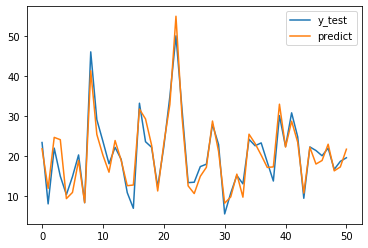

In [71]:
plt.plot(y_test)
plt.plot(predict_test)
# 화면에 그래프를 보여줍니다
plt.legend(['y_test', 'predict'])
plt.show()